### Extraer texto desde archivos PDF. OCR  

El reconocimiento óptico de caracteres (ROC), expresado con frecuencia con la sigla OCR (del inglés Optical Character Recognition), es un proceso dirigido a la digitalización de textos, los cuales identifican automáticamente a partir de una imagen símbolos o caracteres que pertenecen a un determinado alfabeto, para luego almacenarlos en forma de datos. Así podremos interactuar con estos mediante un programa de edición de texto o similar.

In [1]:
!apt install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (214 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 155219 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [2]:
!pip install pdf2image
!pip install easyocr

     |████████████████████████████████| 63.6 MB 20 kB/s 
     |████████████████████████████████| 47.6 MB 32 kB/s 


In [3]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw

In [4]:
reader = easyocr.Reader(['en'])

In [5]:
images = convert_from_path('/content/sample_data/Ibrutinib blocks YAP1 activation and reverses BRAFi resistance in melanoma cells.pdf')
images

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x7F02BA914C10>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x7F02BA92F5D0>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x7F02BA9370D0>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x7F02BA937110>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x7F02BA93B650>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x7F02BA93BBD0>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x7F02BA97FE50>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x7F02BD0D2F90>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x7F02BD0D2610>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x7F02BD0D23D0>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x7F02BD0D2650>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x7F02BA9

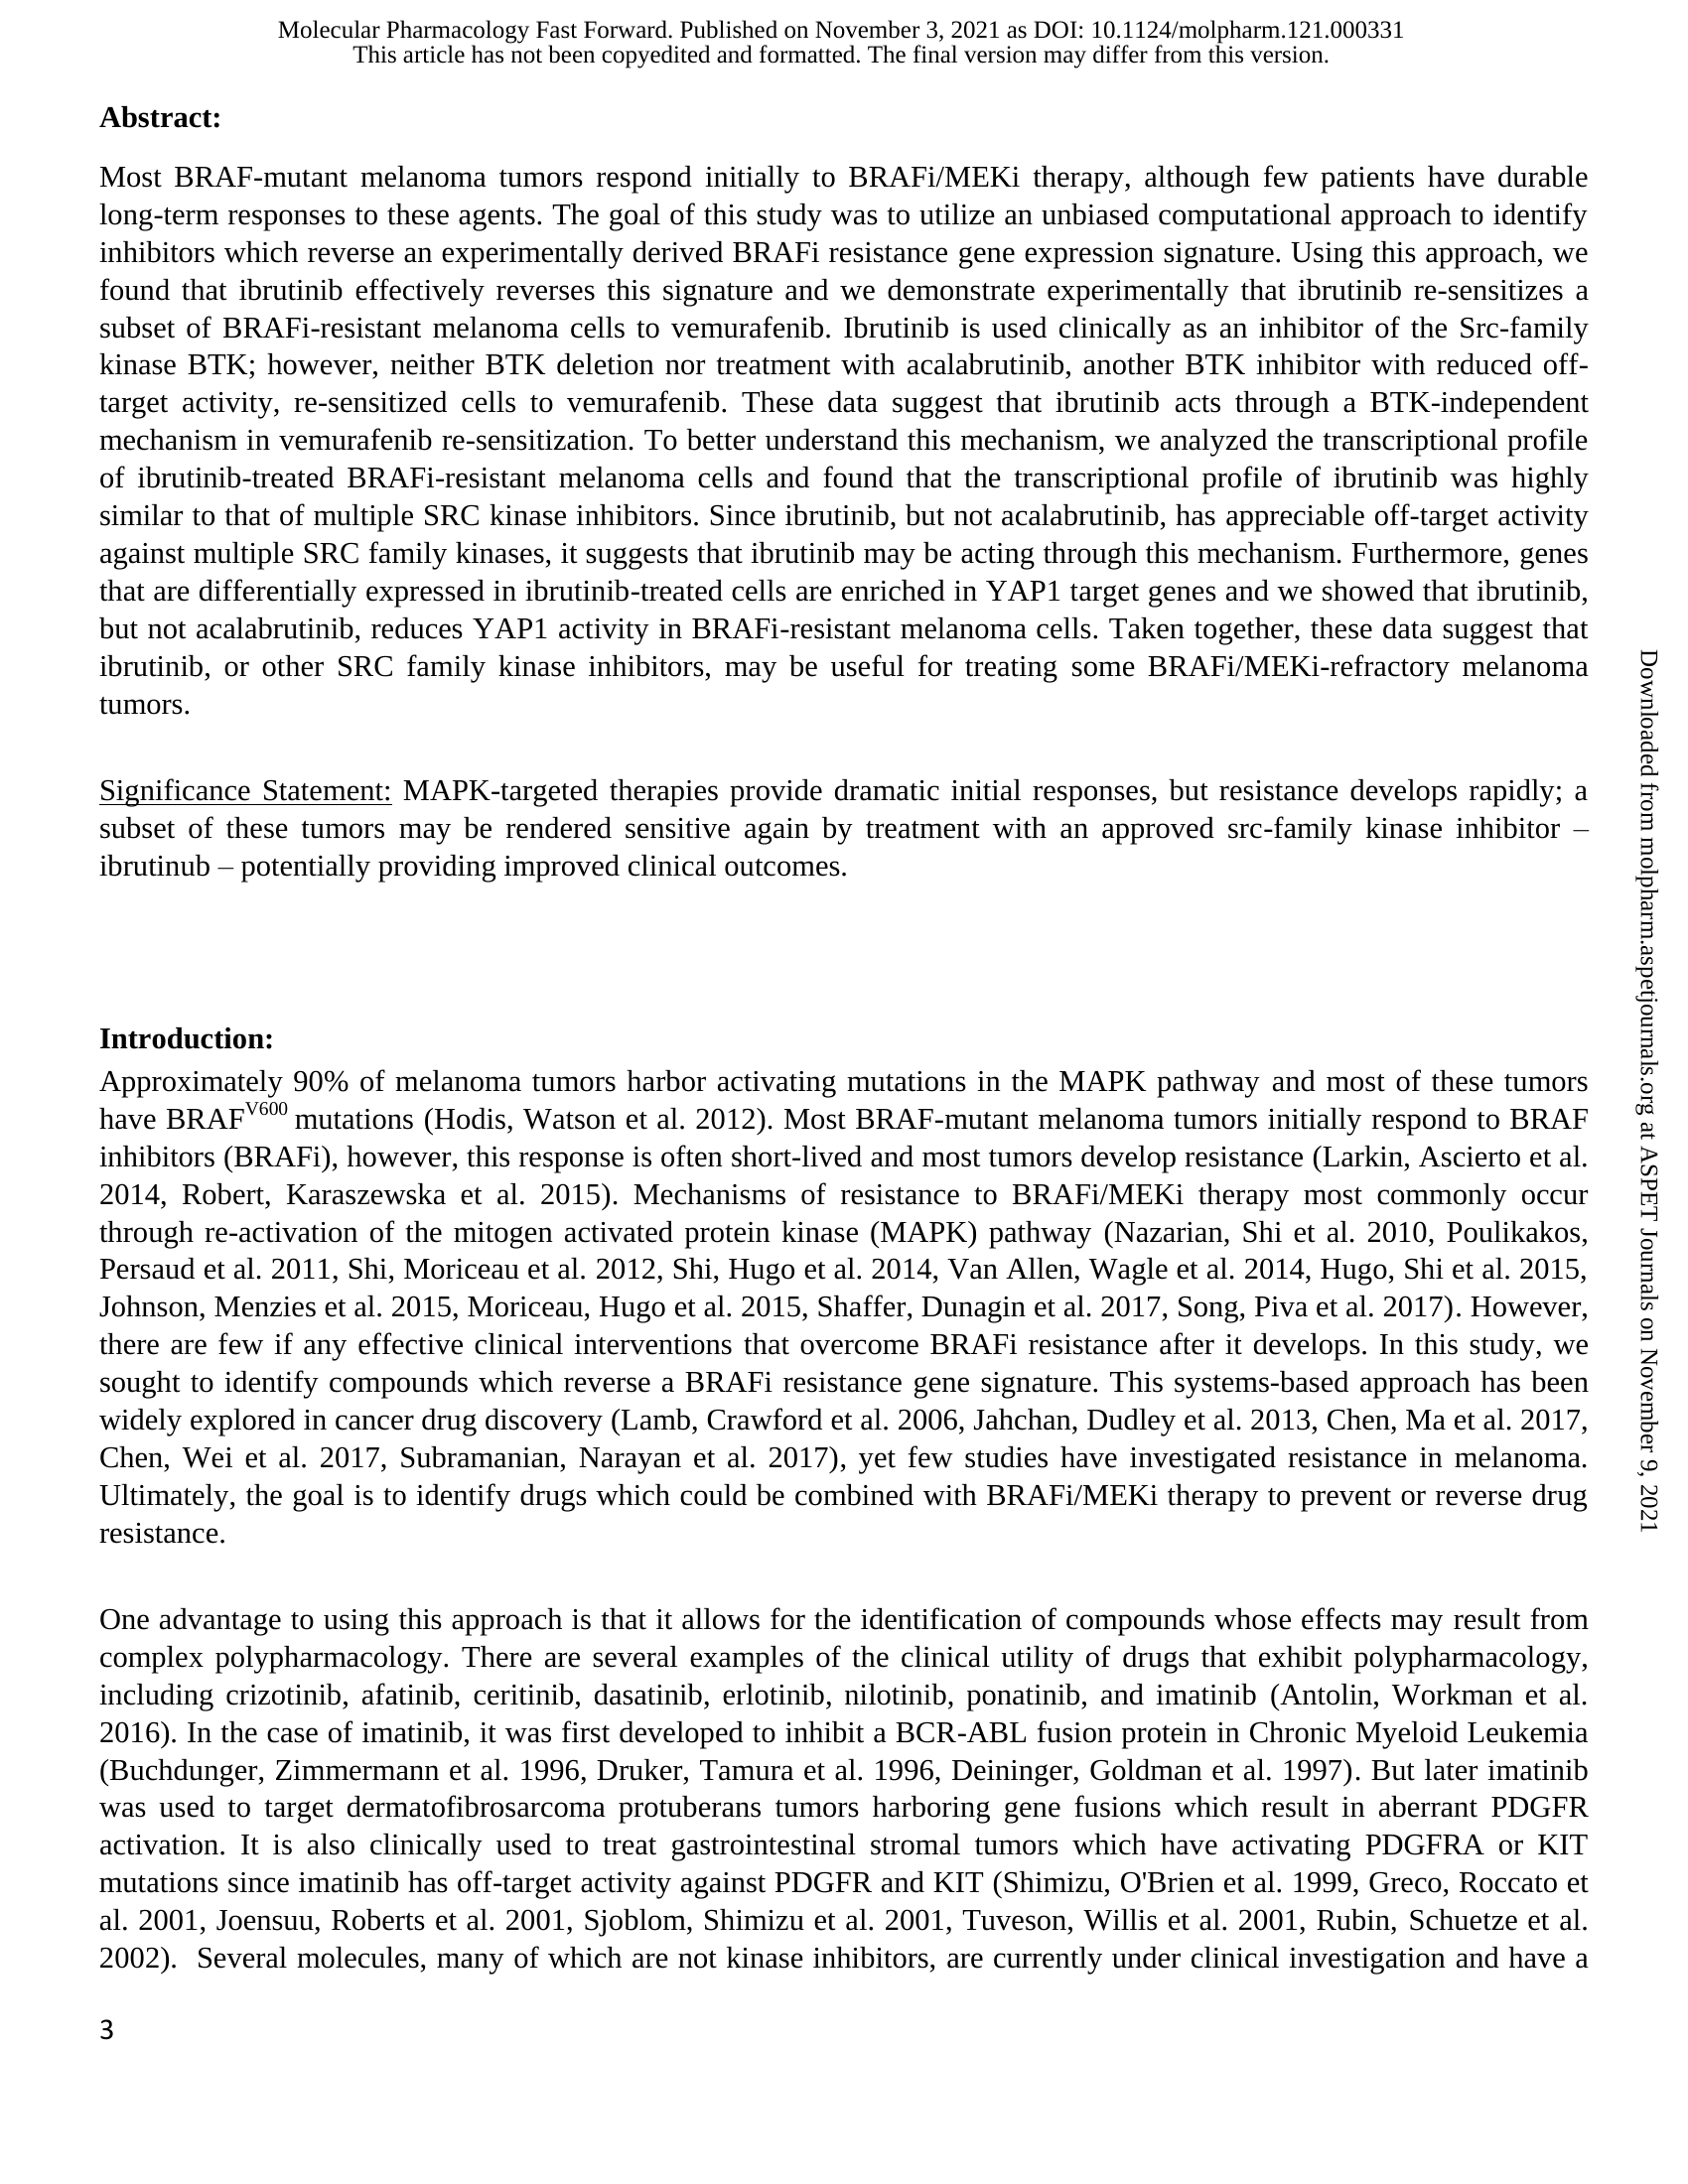

In [6]:
from IPython.display import display, Image
display(images[2])

In [7]:
bounds = reader.readtext(np.array(images[2]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8, decoder='beamsearch', beamWidth=10)
bounds

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[277, 9], [1417, 9], [1417, 50], [277, 50]],
  'Molecular Pharmacology Fast Forward Published on November 3,2021 as DOI: 10.1124/molpharm.121.000331',
  0.7658631041341963),
 ([[351, 37], [1337, 37], [1337, 76], [351, 76]],
  'This article has not been copyedited and formatted. The final version may differ from this version',
  0.7450833663469154),
 ([[100, 104], [226, 104], [226, 134], [100, 134]],
  'Abstract:',
  0.9999974568668727),
 ([[96, 157], [1606, 157], [1606, 205], [96, 205]],
  'Most BRAF-mutant melanoma tumors respond initially to BRAFiMEKi therapy, although few patients have durable',
  0.7297692348527034),
 ([[94, 198], [1605, 198], [1605, 241], [94, 241]],
  'long-term responses to these agents. The goal of this study was to utilize an unbiased computational approach to identify',
  0.833227675047648),
 ([[95, 235], [1604, 235], [1604, 279], [95, 279]],
  'inhibitors which reverse an experimentally derived BRAFi resistance gene expression signature: Using this approa

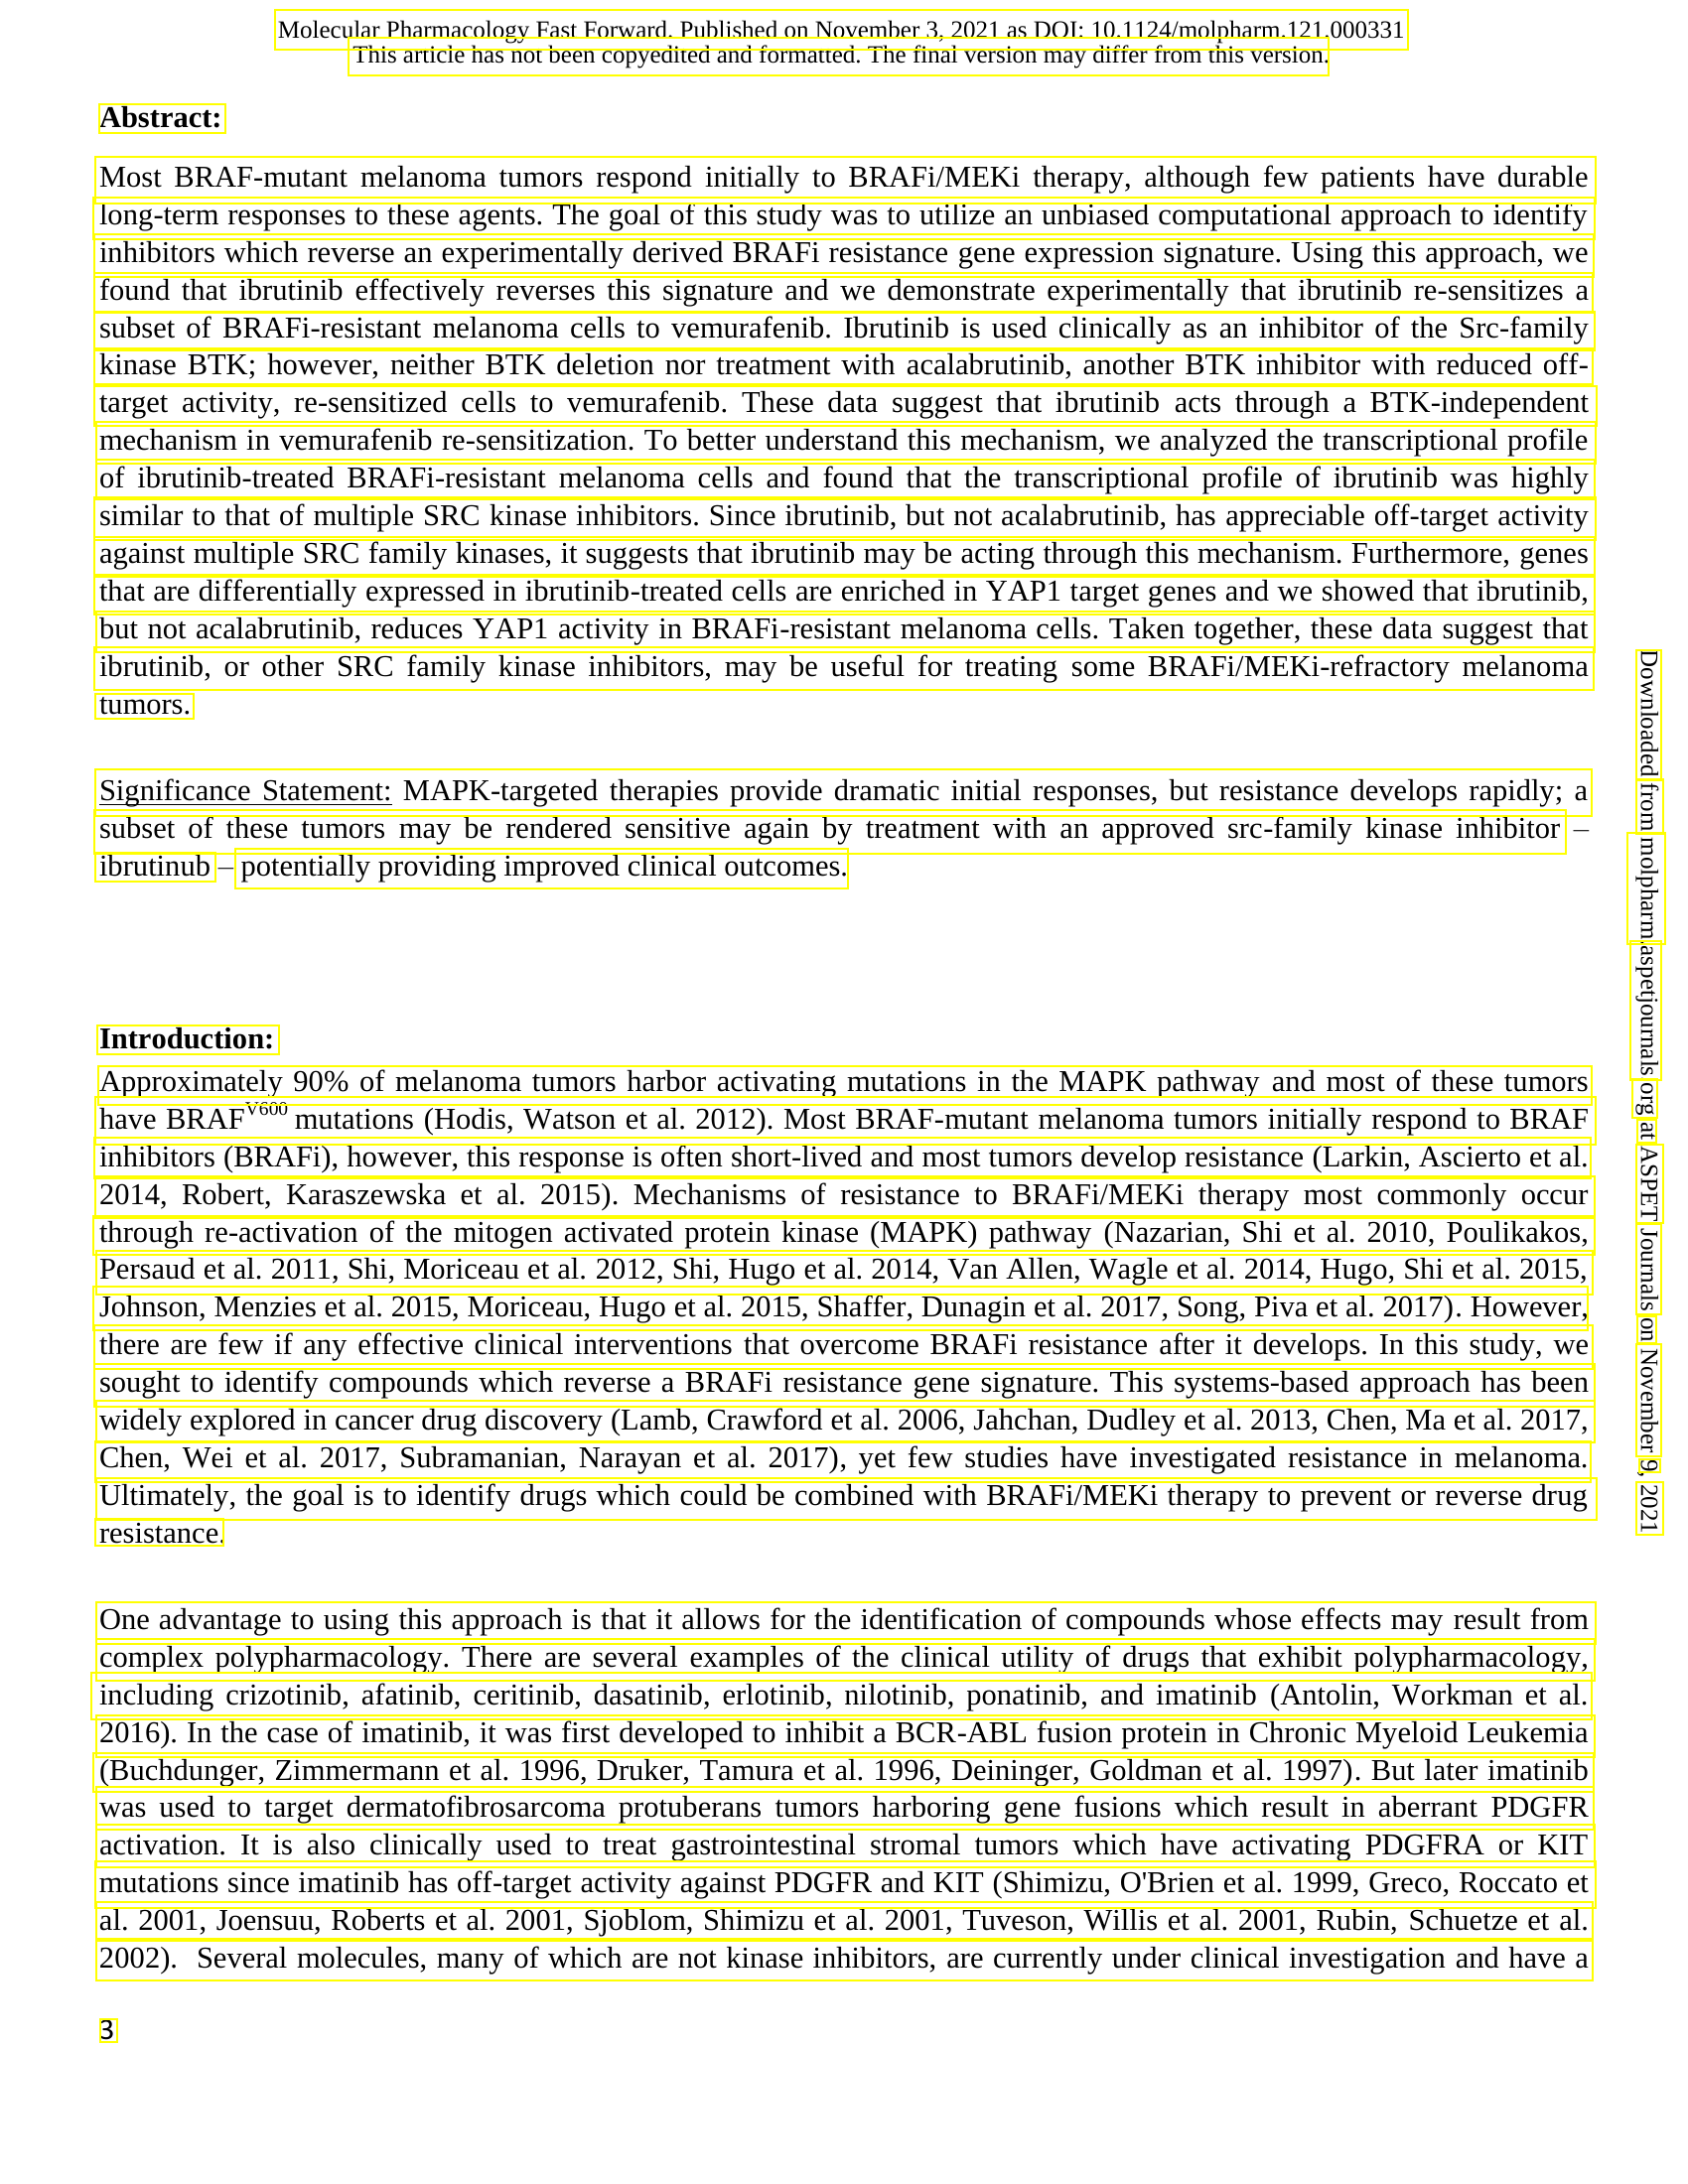

In [8]:
def draw_boxes(image, bounds, color='yellow', width=2):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0, p1, p2, p3 = bound[0]
    draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
  return image 

draw_boxes(images[2], bounds)  

In [9]:
bounds[1][1]

'This article has not been copyedited and formatted. The final version may differ from this version'

In [10]:
text = ''
for i in range(len(bounds)):
  text = text + bounds[i][1] + '\n'

print(text)

Molecular Pharmacology Fast Forward Published on November 3,2021 as DOI: 10.1124/molpharm.121.000331
This article has not been copyedited and formatted. The final version may differ from this version
Abstract:
Most BRAF-mutant melanoma tumors respond initially to BRAFiMEKi therapy, although few patients have durable
long-term responses to these agents. The goal of this study was to utilize an unbiased computational approach to identify
inhibitors which reverse an experimentally derived BRAFi resistance gene expression signature: Using this approach, we
found that ibrutinib effectively reverses this signature and we demonstrate experimentally that ibrutinib re-sensitizes a
subset of BRAFi-resistant melanoma cells to vemurafenib. Ibrutinib is used clinically as an inhibitor of the Src-family
kinase BTK; however; neither BTK deletion nor treatment with acalabrutinib, another BTK inhibitor with reduced off-
target activity, re-sensitized cells to vemurafenib. These data suggest that ibruti

## BERN  
A Neural Named Entity Recognition and Multi-Type Normalization Tool for Biomedical Text Mining  
We propose a neural biomedical entity recognition and multi-type normalization tool (BERN) that uses neural network based NER models (BioBERT (Lee et al., 2019)) to recognize known entities and discover new entities. 

web: https://bern.korea.ac.kr/

In [11]:
import requests

In [12]:
def term_extraction(text, out, type):

  denotations=out['denotations']
  relavent_terms=[]

  if type=='drug':
    drug_terms=[]
    for i in denotations:
      if i['obj']== 'drug':
        drug_terms.append((i['span']['begin'],i['span']['end']))

    for i in drug_terms:
      start=i[0]
      end=i[1]
      relavent_terms.append(text[start:end])
  
  if type=='disease':
    disease_terms=[]
    for i in denotations:
      if i['obj']== 'disease':
        disease_terms.append((i['span']['begin'],i['span']['end']))

    for i in disease_terms:
      start=i[0]
      end=i[1]
      relavent_terms.append(text[start:end])
    
  if type=='species':
    species_terms=[]
    for i in denotations:
      if i['obj']== 'species':
        species_terms.append((i['span']['begin'],i['span']['end']))

    for i in species_terms:
      start=i[0]
      end=i[1]
      relavent_terms.append(text[start:end])

  if type=='gene':
    gene_terms=[]
    for i in denotations:
      if i['obj']== 'gene':
        gene_terms.append((i['span']['begin'],i['span']['end']))

    for i in gene_terms:
      start=i[0]
      end=i[1]
      relavent_terms.append(text[start:end])
  
  return(relavent_terms)

In [13]:
def query_raw(text, url="https://bern.korea.ac.kr/plain"):
  return requests.post(url, data={'sample_text': text}).json()

In [14]:
out = (query_raw(text))
print(out)
print(term_extraction(text, out, 'drug'))
print(term_extraction(text, out, 'disease'))
print(term_extraction(text, out, 'species'))
print(term_extraction(text, out, 'gene'))

{'project': 'BERN', 'sourcedb': '', 'sourceid': 'b2d3f133f4f2470e782181a539f0ae1fcc676632c63c7f41d7a984d1-Thread-6814537', 'text': "Molecular Pharmacology Fast Forward Published on November 3,2021 as DOI: 10.1124/molpharm.121.000331 This article has not been copyedited and formatted. The final version may differ from this version Abstract: Most BRAF-mutant melanoma tumors respond initially to BRAFiMEKi therapy, although few patients have durable long-term responses to these agents. The goal of this study was to utilize an unbiased computational approach to identify inhibitors which reverse an experimentally derived BRAFi resistance gene expression signature: Using this approach, we found that ibrutinib effectively reverses this signature and we demonstrate experimentally that ibrutinib re-sensitizes a subset of BRAFi-resistant melanoma cells to vemurafenib. Ibrutinib is used clinically as an inhibitor of the Src-family kinase BTK; however; neither BTK deletion nor treatment with acalab